In [1]:
#helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob

In [2]:
import numpy
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [3]:
# our own image test data set
our_own_dataset = []

In [4]:
for image_file_name in glob.glob('number/handwriting_?.png'):
    print ("loading ... ", image_file_name)
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    # load image data from png files into an array
    img_array = imageio.imread(image_file_name, as_gray=True)
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    # append label and image data  to test data set
    record = numpy.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass

loading ...  number/handwriting_9.png
0.01
1.0
[9.         0.01       0.01       0.01776471 0.01       0.01
 0.01776471 0.01       0.01776471 0.01       0.01388235 0.01
 0.01776471 0.01       0.01388235 0.01388235 0.01       0.01
 0.01776471 0.01       0.01776471 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.02164706
 0.01       0.01       0.01       0.01776471 0.01388235 0.01388235
 0.01       0.01388235 0.01       0.02552941 0.02164706 0.01
 0.01388235 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01776471 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01388235 0.01       0.01       0.01388235 0.01       0.02552941
 0.01388235 0.01       0.01       0.01776471 0.01388235 0.01776471
 0.02164706 0.01388235 0.01776471 0.01776471 0.01776471 0.01388235
 0.01       0.01776471 0.01       0.01       0.01       0.01
 0.01       0.01       0.02164706 0.01       0.01       0.01
 0.01388

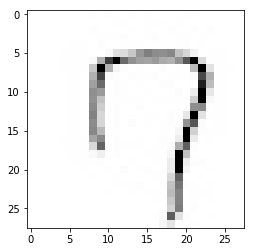

In [5]:
matplotlib.pyplot.imshow(our_own_dataset[3][1:].reshape(28,28), cmap='Greys', interpolation='None')

In [6]:
print(our_own_dataset[0])

[9.         0.01       0.01       0.01776471 0.01       0.01
 0.01776471 0.01       0.01776471 0.01       0.01388235 0.01
 0.01776471 0.01       0.01388235 0.01388235 0.01       0.01
 0.01776471 0.01       0.01776471 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.02164706
 0.01       0.01       0.01       0.01776471 0.01388235 0.01388235
 0.01       0.01388235 0.01       0.02552941 0.02164706 0.01
 0.01388235 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01776471 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01388235 0.01       0.01       0.01388235 0.01       0.02552941
 0.01388235 0.01       0.01       0.01776471 0.01388235 0.01776471
 0.02164706 0.01388235 0.01776471 0.01776471 0.01776471 0.01388235
 0.01       0.01776471 0.01       0.01       0.01       0.01
 0.01       0.01       0.02164706 0.01       0.01       0.01
 0.01388235 0.01       0.02941176 0.01       0.01388235

In [7]:
# 3계층의 신경망으로 MNIST 데이터를 학습하는 코드

import numpy
# 시그모이드 함수 expit() 사용을 위해 scipy.special 불러오기
import scipy.special
# 행렬을 시각화하기 위한 라이브러리
import matplotlib.pyplot
# 시각화가 외부 윈도우가 아닌 현재의 노트북 내에서 보이도록 설정
#get_ipython().magic('matplotlib inline')

#신경망 클래스의 정의
class neuralNetwork:
    
    # 신경망 초기화하기
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # 가중치 행렬 wih와 who
        # 배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        # w11 w21
        # w12 w22 등
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # 학습률
        self.lr = learningrate
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # 신경망 학습시키기
    def train(self, inputs_list, targets_list):
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        # 은닉 계층의 오차는 가중치에의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    
    # 신경망에 질의하기
    def query(self, inputs_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs = numpy.dot(self.wih, inputs)
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
        
# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# 학습률
learning_rate = 0.1

# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file = open("mnist/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 주기(epoch)란 학습 데이터가 학습을 위해 사용되는 횟수를 의미
epochs = 5

for e in range(epochs):
    # 학습 데이터 모음 내의 모든 레코드 탐색
    for record in training_data_list:
        # 레코드를 쉼표에 의해 분리
        all_values = record.split(',')
        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
pass

In [8]:
#helper to load data from PNG image files
import imageio
# glob helps select multiple files using patterns
import glob
# our own image test data set
our_own_dataset = []
scorecard = []
# load the png image data as test data set
for image_file_name in glob.glob('number/handwriting_?.png'):
    
    # use the filename to set the correct label
    correct_label = int(image_file_name[-5:-4])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # query the network
    outputs = n.query(img_data)
    print (outputs)

    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    print("network says ", label)
    # append correct or incorrect to list
    if (label == correct_label):
        scorecard.append(1)
        print ("match!")
    else:
        scorecard.append(0)
        print ("no match!")
        pass
    
    pass

loading ...  number/handwriting_9.png
0.01
1.0
[[3.97013513e-03]
 [1.81046587e-04]
 [4.53300327e-03]
 [1.72270435e-01]
 [1.00588722e-01]
 [5.23947984e-02]
 [1.33523109e-04]
 [3.51663713e-02]
 [1.53400766e-02]
 [4.14892480e-03]]
network says  3
no match!
loading ...  number/handwriting_8.png
0.01
1.0
[[8.21333639e-04]
 [6.05908248e-04]
 [1.01532427e-02]
 [5.23198681e-01]
 [1.30811776e-01]
 [4.31687124e-03]
 [1.40658774e-02]
 [1.40842362e-03]
 [7.22192761e-05]
 [4.77658806e-03]]
network says  3
no match!
loading ...  number/handwriting_6.png
0.01
1.0
[[0.01755046]
 [0.00420568]
 [0.00132784]
 [0.01193802]
 [0.00835919]
 [0.04934754]
 [0.10577177]
 [0.0064059 ]
 [0.04982991]
 [0.00054775]]
network says  6
match!
loading ...  number/handwriting_7.png
0.01
1.0
[[0.1806008 ]
 [0.00026557]
 [0.00251984]
 [0.00115624]
 [0.00259609]
 [0.01790345]
 [0.00028462]
 [0.01526664]
 [0.00707044]
 [0.00720445]]
network says  0
no match!
loading ...  number/handwriting_5.png
0.01
1.0
[[0.03859676]
 [0.00

In [9]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.4
